In [48]:
trade_path = r"C:\Users\AJ\Desktop\Dev Work\Bt_WorkFlow\Results\trades.csv"

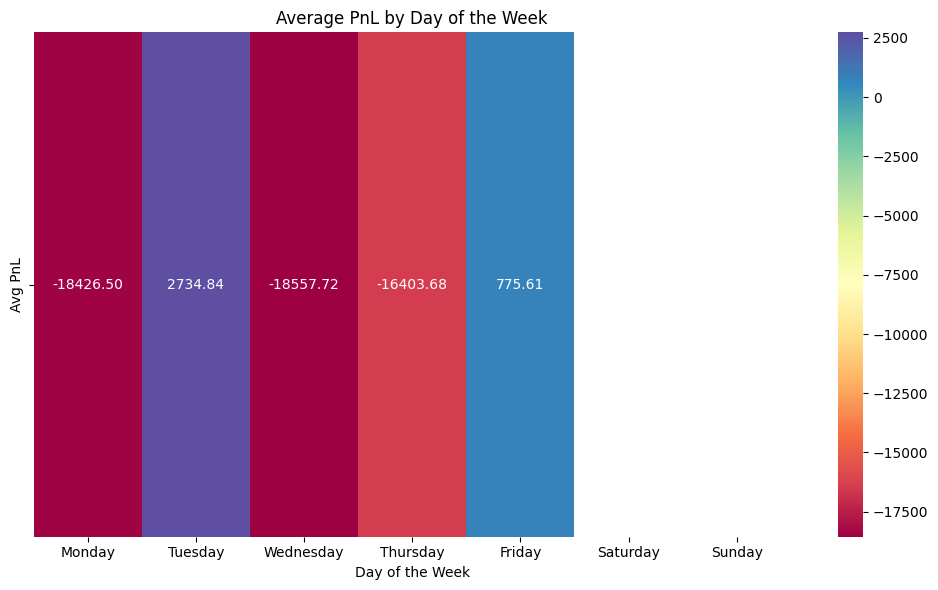


===== Performance by Day of the Week =====
           TotalTrades  TotalPnL%   AvgPnL%
DayOfWeek                                  
Monday               7 -54.641267 -7.805895
Tuesday              4   4.634171  1.158543
Wednesday            4 -31.445938 -7.861484
Thursday             3 -20.846937 -6.948979
Friday               7   2.299970  0.328567
Saturday             0        NaN       NaN
Sunday               0        NaN       NaN


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Load the CSV file
df = pd.read_csv(trade_path, parse_dates=["EntryTime", "ExitTime"])

# Extract the day of the week (DOW) from the EntryTime
df['DayOfWeek'] = df['EntryTime'].dt.day_name()

# Group by Day of the Week and calculate performance metrics
dow_performance = df.groupby('DayOfWeek').agg(
    TotalTrades=('PnL', 'count'),
    TotalPnL=('PnL', 'sum'),
    AvgPnL=('PnL', 'mean')
).reindex(list(calendar.day_name))  # Convert calendar.day_name to a list

# Calculate percentage metrics
total_pnl_sum = dow_performance['TotalPnL'].sum()
dow_performance['TotalPnL%'] = (dow_performance['TotalPnL'] / abs(total_pnl_sum)) * 100  # Use absolute value of total PnL
dow_performance['AvgPnL%'] = (dow_performance['AvgPnL'] / abs(total_pnl_sum)) * 100  # Use absolute value of total PnL

# Fill NaN values in TotalTrades with 0 and convert to integers
dow_performance['TotalTrades'] = dow_performance['TotalTrades'].fillna(0).astype(int)

# --- Visualization: Calendar-like Heatmap ---
plt.figure(figsize=(10, 6))
sns.heatmap(
    dow_performance[['AvgPnL']].T,  # Transpose to show DOW as columns
    annot=True, fmt=".2f", cmap="Spectral", cbar=True,
    xticklabels=dow_performance.index, yticklabels=["Avg PnL"]
)
plt.title("Average PnL by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("")
plt.tight_layout()
plt.show()

# --- Print Summary ---
print("\n===== Performance by Day of the Week =====")
print(dow_performance[['TotalTrades', 'TotalPnL%', 'AvgPnL%']])

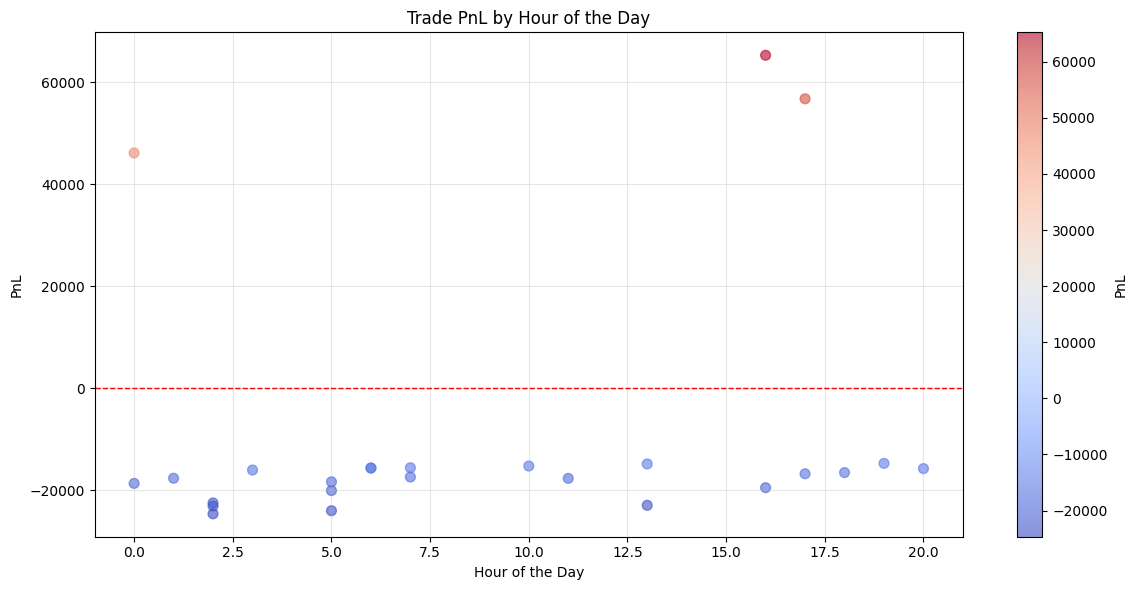

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Load the CSV file
df = pd.read_csv(trade_path, parse_dates=["EntryTime", "ExitTime"])

# Extract the day of the week (DOW) and hour of the day from the EntryTime
df['DayOfWeek'] = df['EntryTime'].dt.day_name()
df['HourOfDay'] = df['EntryTime'].dt.hour

# --- Scatter Plot for Hourly Performance ---
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    df['HourOfDay'], df['PnL'], 
    alpha=0.6, c=df['PnL'], cmap='coolwarm', s=50
)
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Add a horizontal line at 0 for reference
plt.colorbar(scatter, label="PnL")  # Add a color bar to show PnL values
plt.title("Trade PnL by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("PnL")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

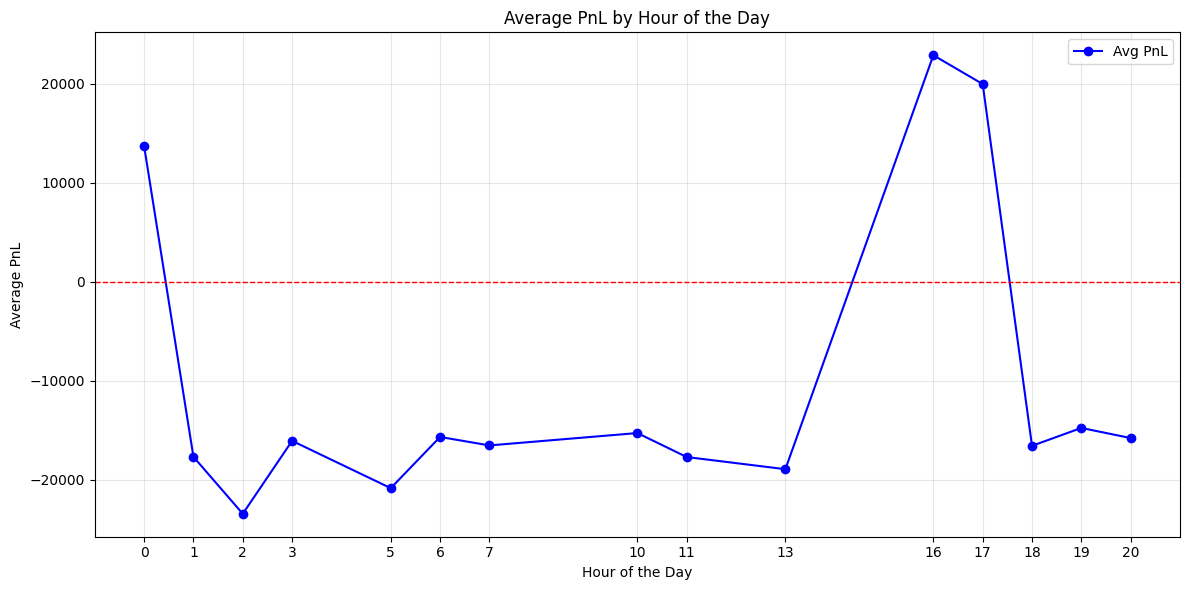

In [51]:
# Line Chart for Hourly Performance
plt.figure(figsize=(12, 6))
plt.plot(hourly_performance.index, hourly_performance['AvgPnL'], marker='o', label='Avg PnL', color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Add a horizontal line at 0 for reference
plt.title("Average PnL by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Average PnL")
plt.xticks(hourly_performance.index)  # Ensure all hours are shown on the x-axis
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

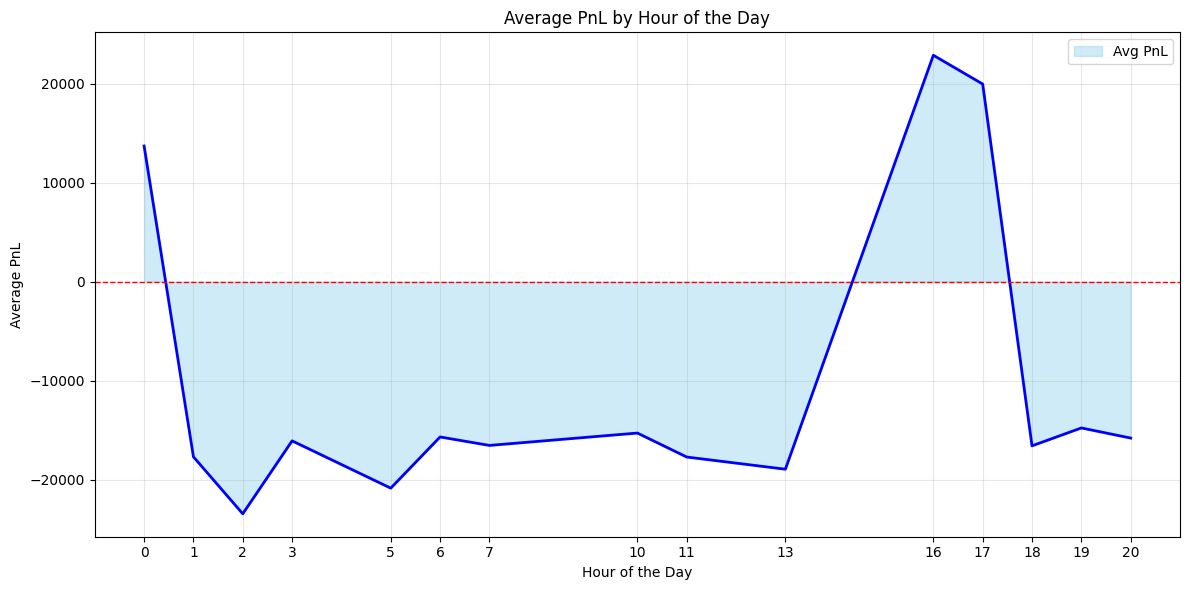

In [52]:
# Area Chart for Hourly Performance
plt.figure(figsize=(12, 6))
plt.fill_between(hourly_performance.index, hourly_performance['AvgPnL'], color='skyblue', alpha=0.4, label='Avg PnL')
plt.plot(hourly_performance.index, hourly_performance['AvgPnL'], color='blue', linewidth=2)
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Add a horizontal line at 0 for reference
plt.title("Average PnL by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Average PnL")
plt.xticks(hourly_performance.index)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [53]:
# Calculate performance metrics by Hour of the Day
hourly_performance = df.groupby('HourOfDay').agg(
    TotalTrades=('PnL', 'count'),
    TotalPnL=('PnL', 'sum'),
    AvgPnL=('PnL', 'mean')
)

# Calculate percentage metrics for hourly performance
total_hourly_pnl_sum = hourly_performance['TotalPnL'].sum()
hourly_performance['TotalPnL%'] = (hourly_performance['TotalPnL'] / abs(total_hourly_pnl_sum)) * 100  # Use absolute value of total PnL
hourly_performance['AvgPnL%'] = (hourly_performance['AvgPnL'] / abs(total_hourly_pnl_sum)) * 100  # Use absolute value of total PnL

# Fill NaN values in TotalTrades with 0 and convert to integers
hourly_performance['TotalTrades'] = hourly_performance['TotalTrades'].fillna(0).astype(int)

# Print the hourly performance stats
print("\n===== Performance by Hour of the Day =====")
print(hourly_performance[['TotalTrades', 'TotalPnL%', 'AvgPnL%']])


===== Performance by Hour of the Day =====
           TotalTrades  TotalPnL%   AvgPnL%
HourOfDay                                  
0                    2  11.603957  5.801978
1                    1  -7.492541 -7.492541
2                    3 -29.788202 -9.929401
3                    1  -6.809912 -6.809912
5                    3 -26.498037 -8.832679
6                    2 -13.285665 -6.642833
7                    2 -14.009180 -7.004590
10                   1  -6.475760 -6.475760
11                   1  -7.501476 -7.501476
13                   2 -16.044145 -8.022072
16                   2  19.366418  9.683209
17                   2  16.904458  8.452229
18                   1  -7.022520 -7.022520
19                   1  -6.257284 -6.257284
20                   1  -6.690111 -6.690111
